#  Innobyte Services Internship

# Project : Data Analysis of Superstore Retail Sales dataset

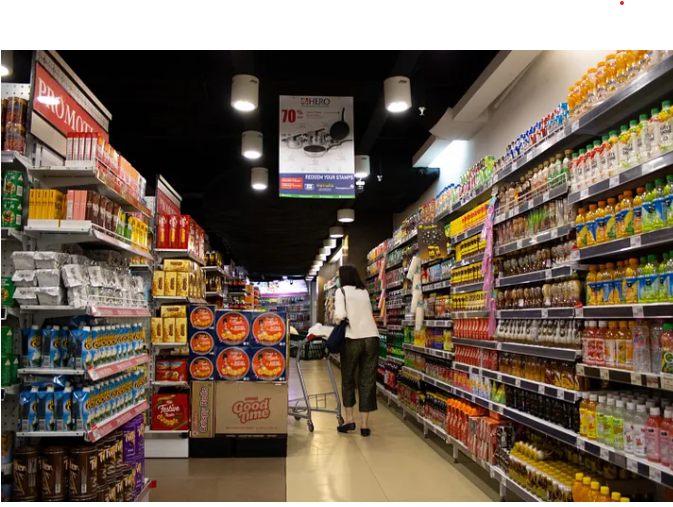

## Introduction :

Welcome to the Sales Store Analysis notebook! In this notebook, we will be delving into the intricate details of sales data from our store. The objective of this analysis is to gain valuable insights into our sales performance, understand customer behavior, identify trends, and ultimately make data-driven decisions to improve our business operations.

### Throughout this analysis, we will explore various aspects of our sales data, including but not limited to:

1. Sales Trends: Examining overall sales trends over time to identify any seasonal patterns or fluctuations.
2. Product Performance: Analyzing the performance of individual products or product categories to identify top-selling items and areas for improvement.
3. Customer Segmentation: Understanding our customer base by segmenting them based on demographics, purchasing behavior, or other relevant factors.
4. Geographical Analysis: Investigating sales performance across different regions to identify geographical trends and opportunities.
5. The columns available in dataset

# Importing the Libraries

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from scipy import stats 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR         
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import time


#   Data Exploration

## Loading the dataset

In [108]:
df=pd.read_csv("SampleSuperstore.csv")

In [109]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [110]:
df.shape

(9994, 13)

### Columns in Dataset

In [111]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [112]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Data cleaning and preprocessing

Handling Null Values and Duplicates.

In [114]:
# Checking for null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Observation :  No Missing Values find

In [115]:
#checking for duplicates value

df.duplicated().sum()

17

In [116]:
df.drop_duplicates(inplace=True)

# Removing duplicate values

In [117]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [118]:
df.shape

(9977, 13)

In [119]:
df.duplicated().sum()

0

## Statistical Summary of data

In [120]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


### Describe method shows:

There are  9977 records (sales)

Sales values are in the range of 0.444000 to 22,638.48 with average 230.77 and standard deviation of 623.72

In [121]:
df.describe(include="object")


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9977,9977,9977,9977,9977,9977,9977,9977
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5955,5183,9977,914,1996,3193,6012,1522


## Exploring Unique Values.


In [122]:
df.nunique()


Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Let's see how many unique values in each of State, Category, Sub-Category, and Ship Mode

In [123]:
print('* There are stores in {} states'.format(len(df['State'].unique())))

print('* There are {} different categories'.format(len(df['Category'].unique())))

print('* There are {} different sub categories'.format(len(df['Sub-Category'].unique())))

print('* There are {} different ship mode'.format(len(df['Ship Mode'].unique())))


* There are stores in 49 states
* There are 3 different categories
* There are 17 different sub categories
* There are 4 different ship mode


In [124]:
# Total sales and Profit

In [125]:
print('Total profit of the superstore:',df['Profit'].sum())

Total profit of the superstore: 286241.4226


In [126]:
print('Total sales of the superstore:',df['Sales'].sum())

Total sales of the superstore: 2296195.5903


# Customer segmentation

In [127]:
# Types of unique values in segment
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [128]:
# No. of unique values in each segment
df['Segment'].value_counts()


Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

<Axes: ylabel='Segment'>

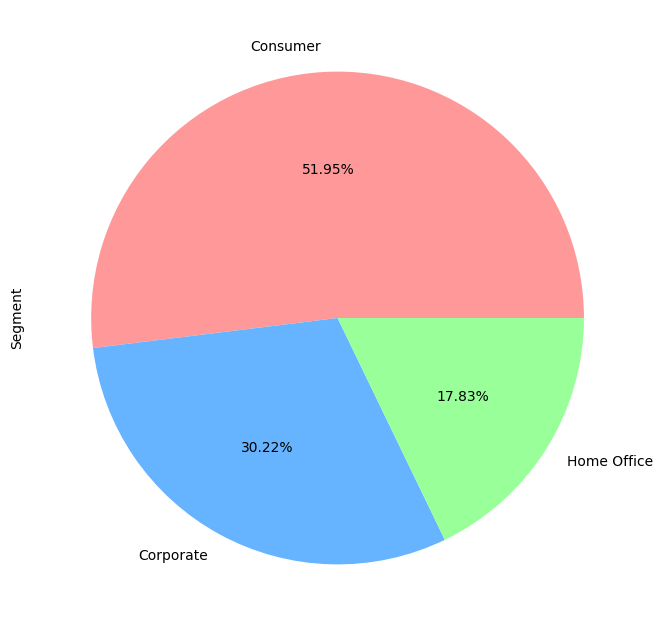

In [129]:
df['Segment'].value_counts().plot(kind='pie', autopct = '%1.2f%%', colors = ['#ff9999','#66b3ff','#99ff99'])

### Observation  :

Around 50% of customers in the dataset are classified as consumers, indicating a 
significant portion of individual buyers among the customer base.

<Axes: title={'center': 'Customer segment based on region'}, xlabel='Segment', ylabel='count'>

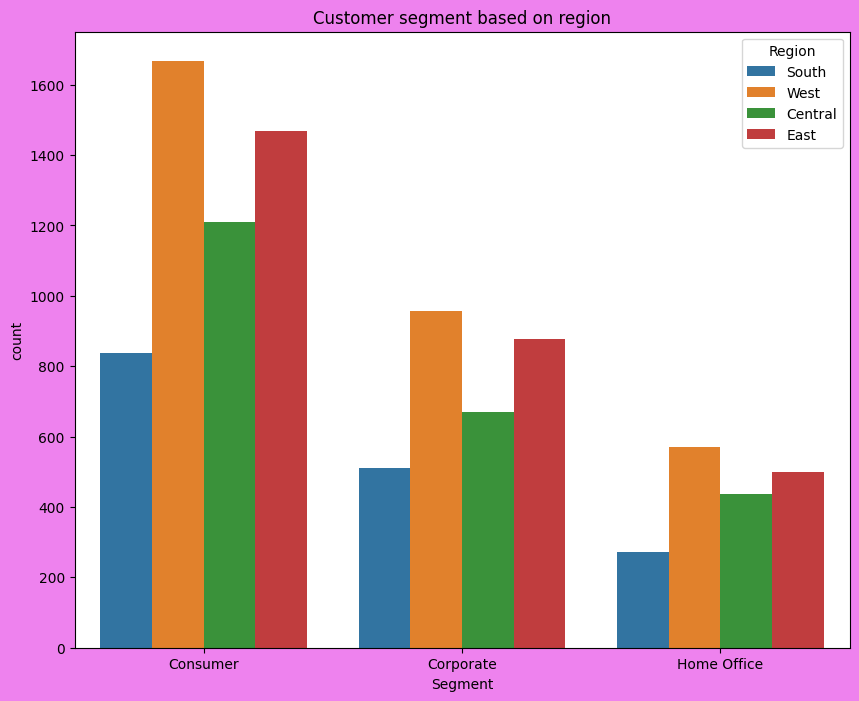

In [130]:
plt.figure(facecolor='violet')
plt.title('Customer segment based on region')
sns.countplot(x='Segment',data=df,hue='Region')

In [131]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [132]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

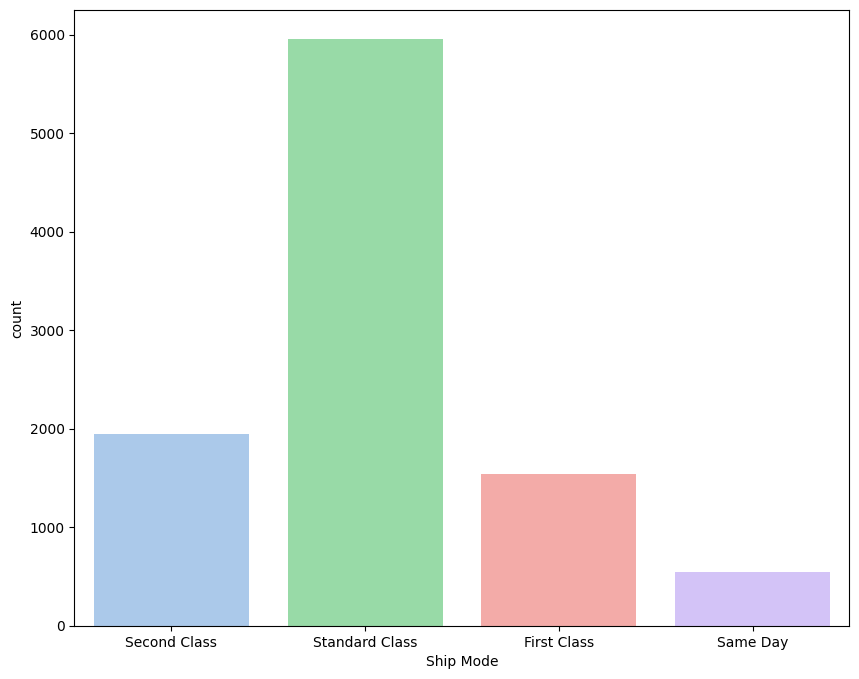

In [133]:
sns.countplot(data=df,x='Ship Mode',palette=['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff'])
plt.show()

### Observation  :

The majority of customers prefer the standard class ship mode compared to other options like first class, second class, or same day.



# Product Analysis

## Analysis of Order Count Distribution Across Various Categories.


In [134]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [135]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

<Axes: ylabel='Category'>

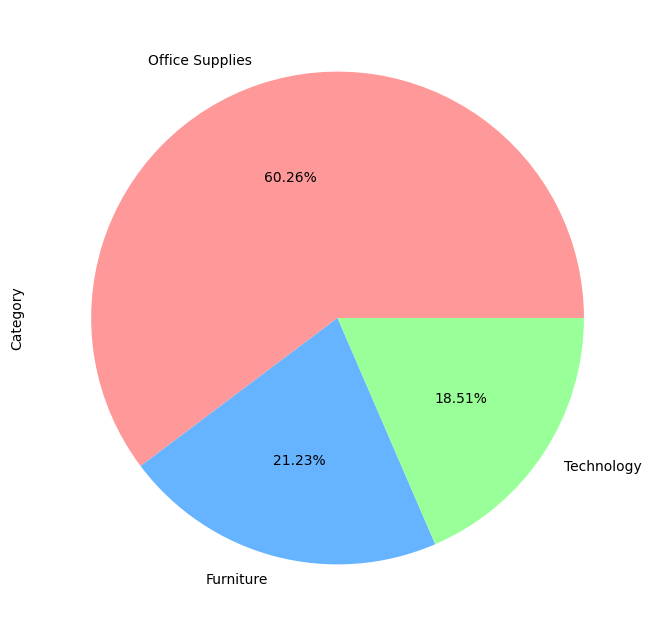

In [136]:
df['Category'].value_counts().plot(kind='pie', autopct = '%1.2f%%', colors = ['#ff9999','#66b3ff','#99ff99'])

### Observation :



Above 60% of customers in the dataset place orders for office supplies.


## Distribution of  orders count across top 10 states

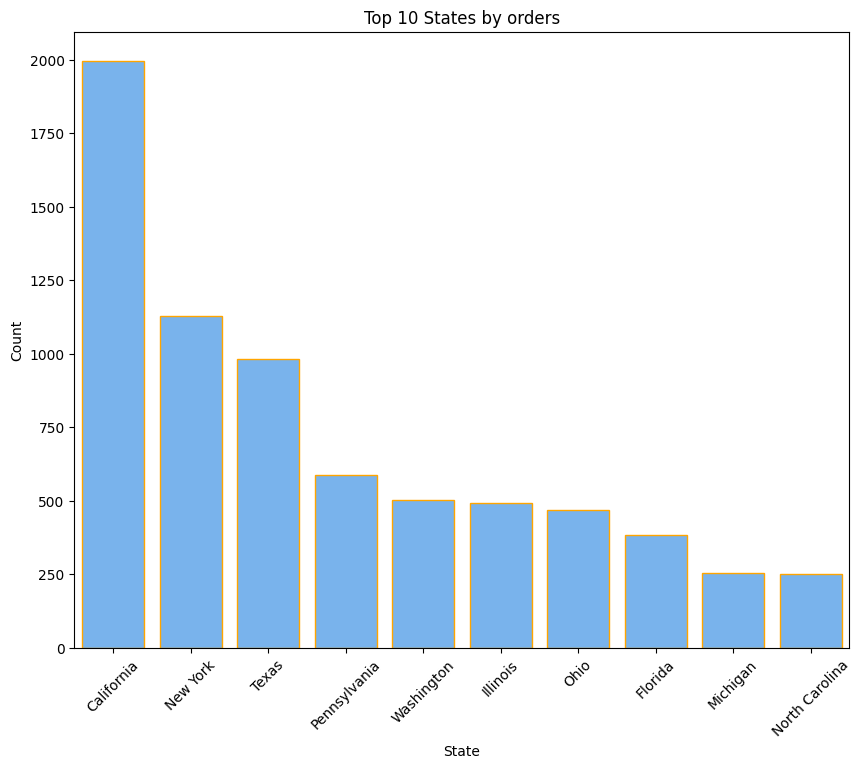

In [137]:
state=df['State'].value_counts().index[:10]
count=df['State'].value_counts().values[:10]
sns.barplot(x=state,y=count,data=df,color= '#66b3ff',edgecolor='orange')
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 States by orders')
plt.show()


### Observation :


The plot above displays the top 10 cities by some metric, where California standing out as having the highest number of order counts.

## Analysis of Sales Distribution.


This title conveys that you have conducted an analysis based on the sales column, 
comparing it with different categories.


<Axes: xlabel='Category', ylabel='Sales'>

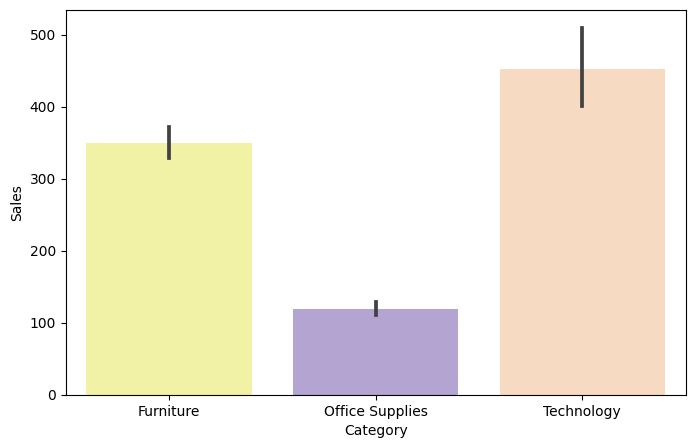

In [138]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x="Category",y="Sales",palette=["#FFFF99", "#B19CD9", "#FFDAB9"])

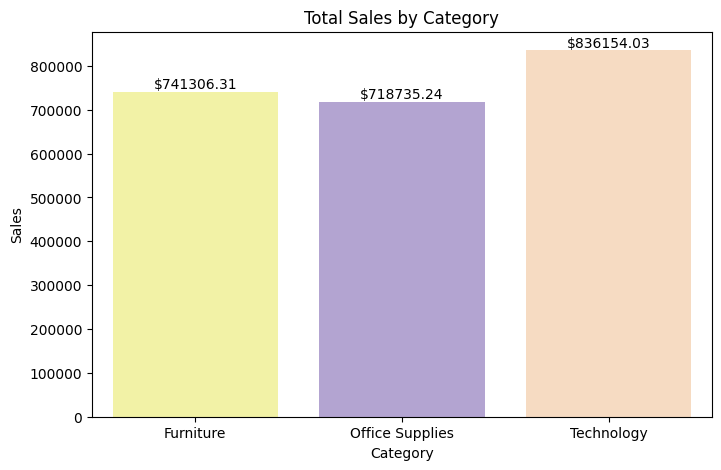

In [139]:
cat_s=df.groupby("Category")["Sales"].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=cat_s,x="Category",y="Sales",palette=["#FFFF99", "#B19CD9", "#FFDAB9"])

for index, row in cat_s.iterrows():
    plt.annotate(f"${row['Sales']:.2f}", (index, row['Sales']), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Total Sales by Category')
plt.show()


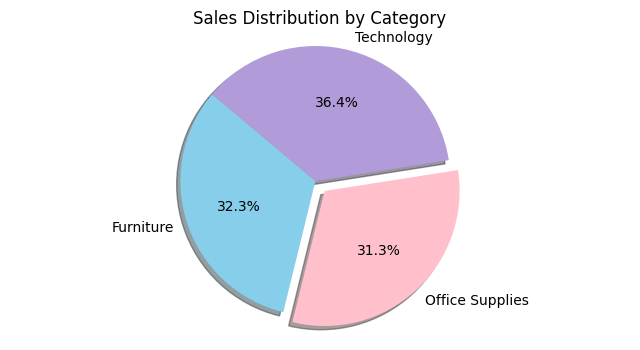

In [140]:
reg_s=df.groupby("Category")["Sales"].sum().reset_index()
sales=reg_s["Sales"].tolist()
category=reg_s["Category"].tolist()


plt.figure(figsize=(8,4))
plt.pie(sales, labels=category,
        autopct='%1.1f%%',
        colors=["#87CEEB", "#FFC0CB", "#B19CD9"],
        shadow=True,
        explode = [0, 0.1, 0],
        startangle=140)
plt.title('Sales Distribution by Category')
plt.axis('equal')  
plt.show()

### Observation :

The plot above depicts the sales distribution across different categories, highlighting the Technology as the leader in terms of sales.

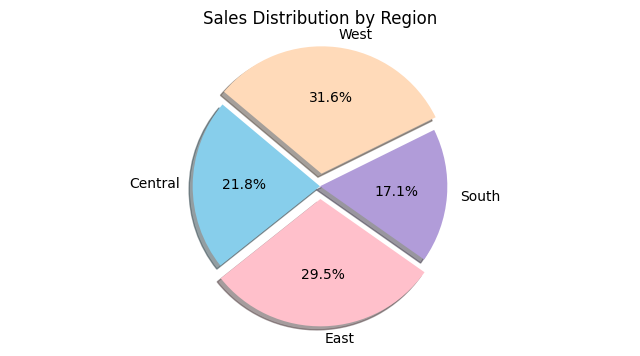

In [141]:
reg_s=df.groupby("Region")["Sales"].sum().reset_index()
sales=reg_s["Sales"].tolist()
regions=reg_s["Region"].tolist()

plt.figure(figsize=(8,4))
plt.pie(sales, labels=regions,
        autopct='%1.1f%%',
        colors=["#87CEEB", "#FFC0CB", "#B19CD9", "#FFDAB9"],
        shadow=True,
        explode = [0, 0.1, 0, 0.1],
        startangle=140)
plt.title('Sales Distribution by Region')
plt.axis('equal')  
plt.show()

### Observation :

The plot above illustrates the distribution of sales by region.
The West region stands out with the highest sales.

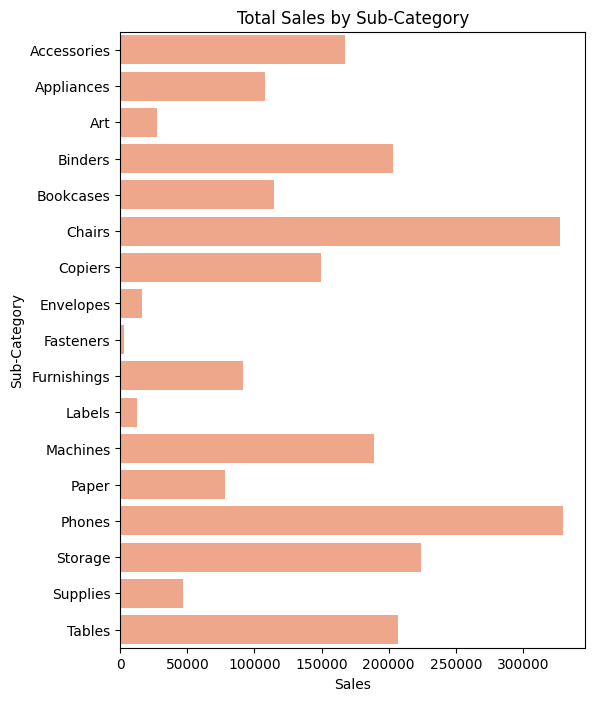

In [142]:
scat_s=df.groupby("Sub-Category")["Sales"].sum().reset_index()

plt.figure(figsize=(6,8))
sns.barplot(data=scat_s,y="Sub-Category",x="Sales",color="#FFA07A")
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.title('Total Sales by Sub-Category')
plt.show()


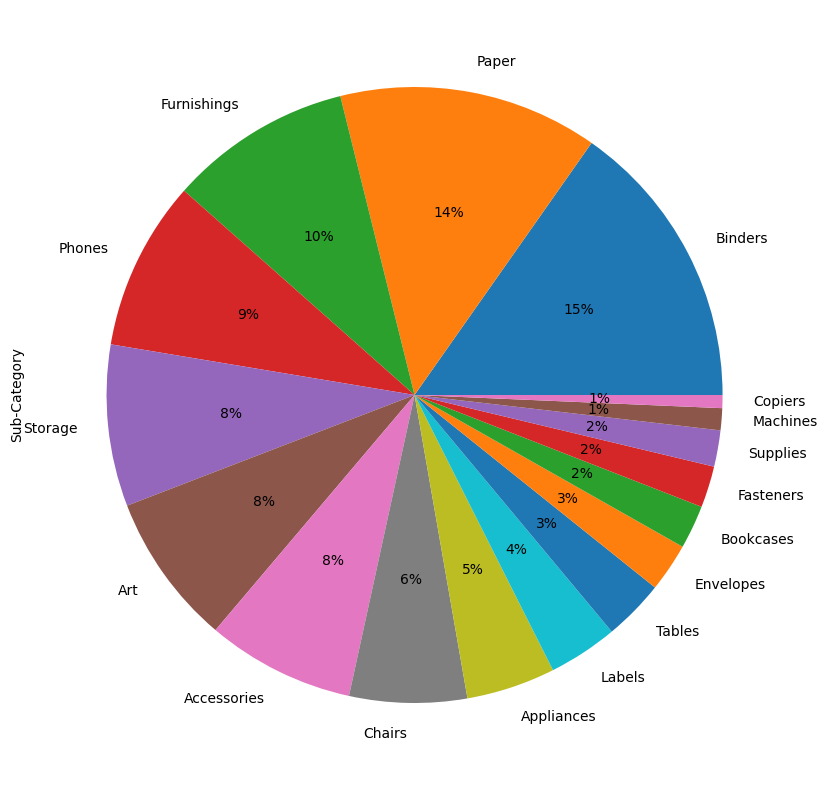

In [143]:
plt.figure(figsize=(12,10))
df["Sub-Category"].value_counts().plot.pie(autopct="%1.0f%%")
plt.show()

## Observation

Chairs and Tables have high sales, both around $300,000.


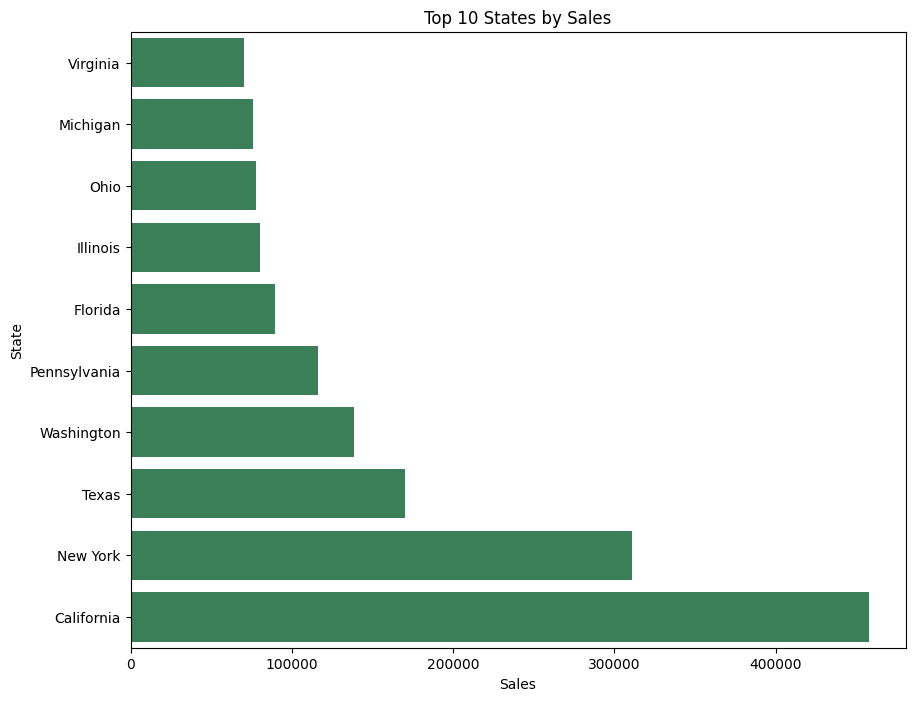

In [144]:
sta_s=df.groupby("State")["Sales"].sum().reset_index()
sta_s=sta_s.sort_values(by="Sales")
sta_s=sta_s.tail(10)

sns.barplot(data=sta_s,y="State",x="Sales",color="seagreen")
plt.xlabel('Sales')
plt.ylabel('State')
plt.title('Top 10 States by Sales')
plt.show()


### Observation :

The distribution of sales across states reveals a notable disparity, with California and New York leading in sales volume, suggesting strong market presence and economic activity

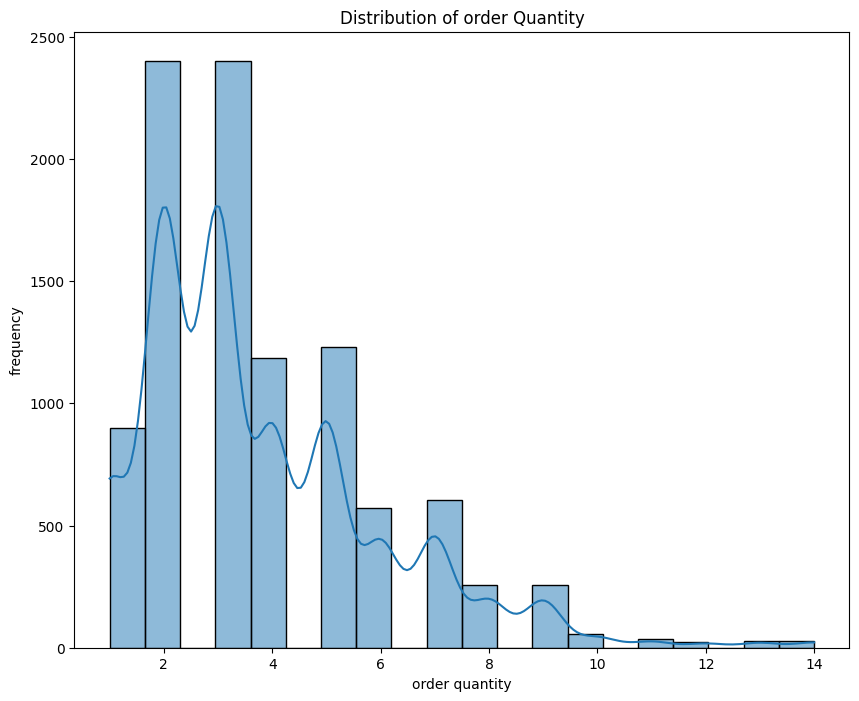

In [145]:
sns.histplot(df['Quantity'], bins=20, kde=True)
plt.title('Distribution of order Quantity')
plt.xlabel('order quantity')
plt.ylabel('frequency')
plt.show()

In [146]:
count_sub=df.groupby(["Category","Sub-Category"]).size().reset_index(name='Count')
fig = px.bar(count_sub, x='Category', y='Count', color='Sub-Category',
             title='Counts of Sub-Categories within Main Categories',
             labels={'Count': 'Number of Items Sold'},
             barmode='group')
fig.show()

## Observation :

Here, we can see that throughout the sub-categories the main category of Office Supplies having highest no. of sales distribution 

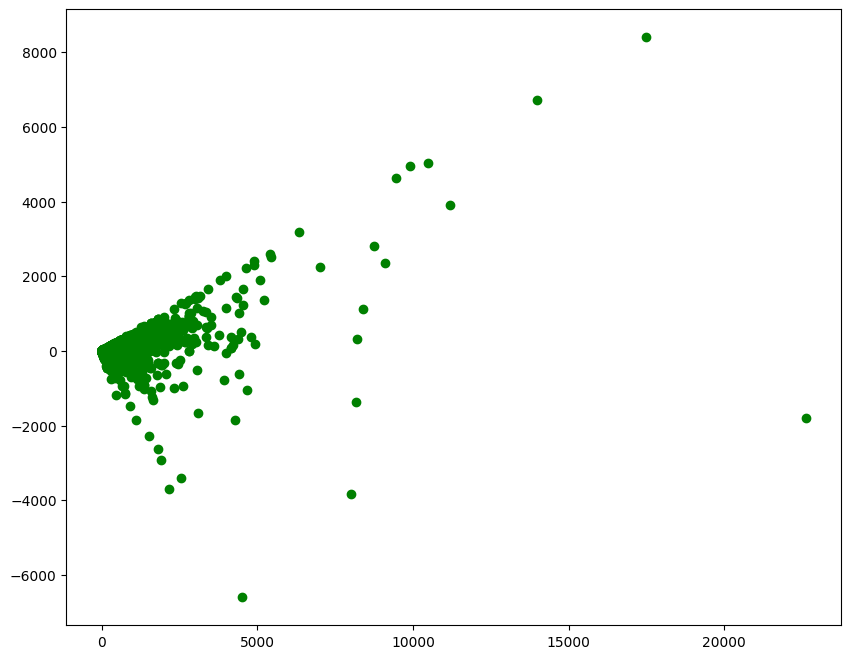

In [147]:
plt.scatter(df['Sales'],df['Profit'],color='green')

# Profit of sales based on region

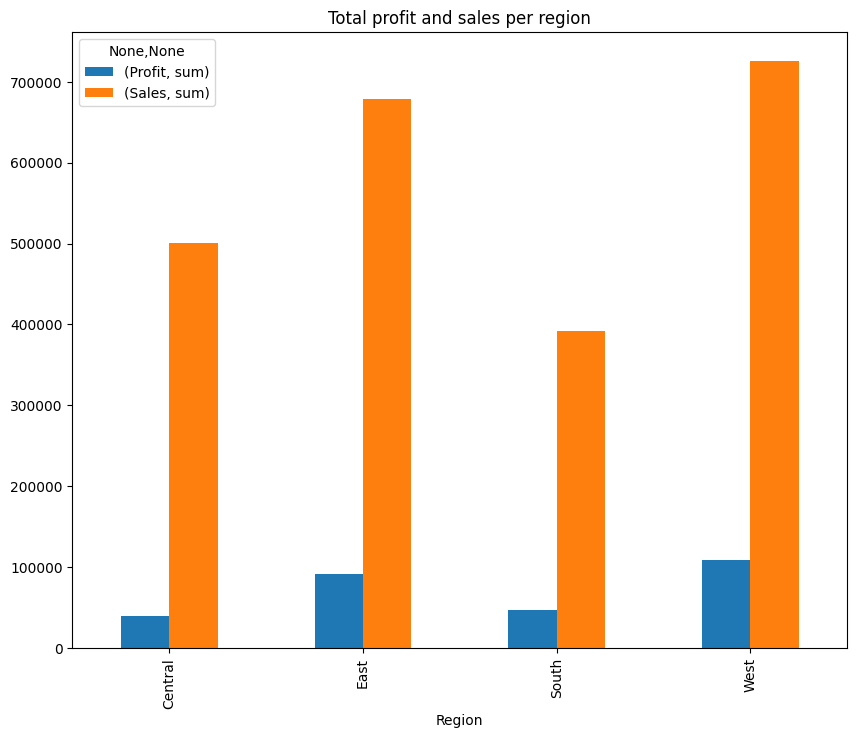

In [148]:
df.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total profit and sales per region')
plt.rcParams['figure.figsize']=[10,8]
plt.show()

## Observation : 

The highest profit earn in East and west region and also sales are high no. of sales are belongs to the same region.

# Profit of sales based on Sub-Category

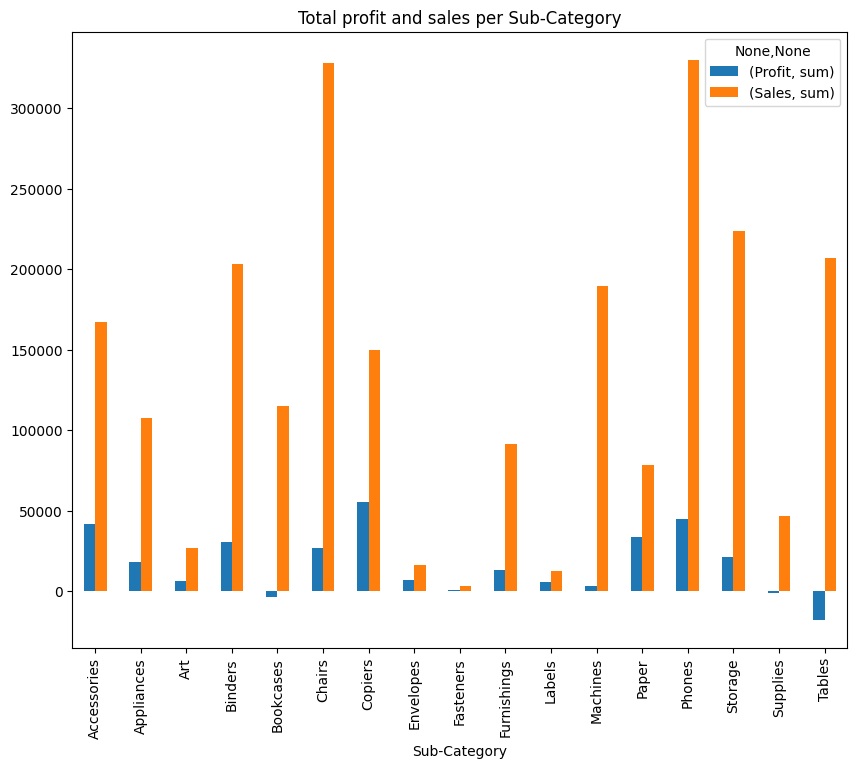

In [169]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total profit and sales per Sub-Category')
plt.rcParams['figure.figsize']=[10,8]
plt.show()

## Observation :

The Highest profit is earned in copiers while, the selling of phones and chairs are extremely high compared to other products.

Another interesting fact-peoples don't prefer to buy tables and Bookcases from superstore as sales is medium but they are facing loss

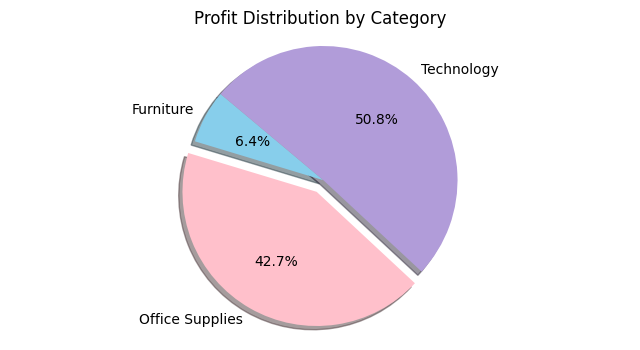

In [167]:
cat_s=df.groupby("Category")["Profit"].sum().reset_index()
profit=cat_s["Profit"].tolist()
category=cat_s["Category"].tolist()


plt.figure(figsize=(8,4))
plt.pie(profit, labels=category,
        autopct='%1.1f%%',
        colors=["#87CEEB", "#FFC0CB", "#B19CD9"],
        shadow=True,
        explode = [0, 0.1, 0],
        startangle=140)
plt.title('Profit Distribution by Category')
plt.axis('equal')  
plt.show()

# Profit of sales based on Segments


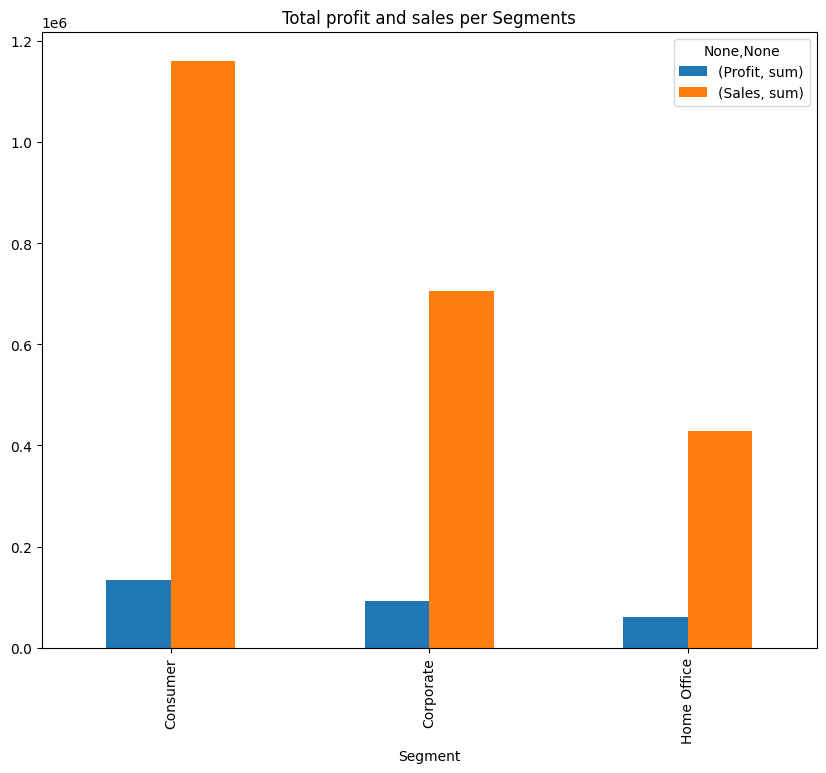

In [170]:
df.groupby('Segment')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total profit and sales per Segments')
plt.rcParams['figure.figsize']=[10,8]
plt.show()

<Axes: xlabel='Profit'>

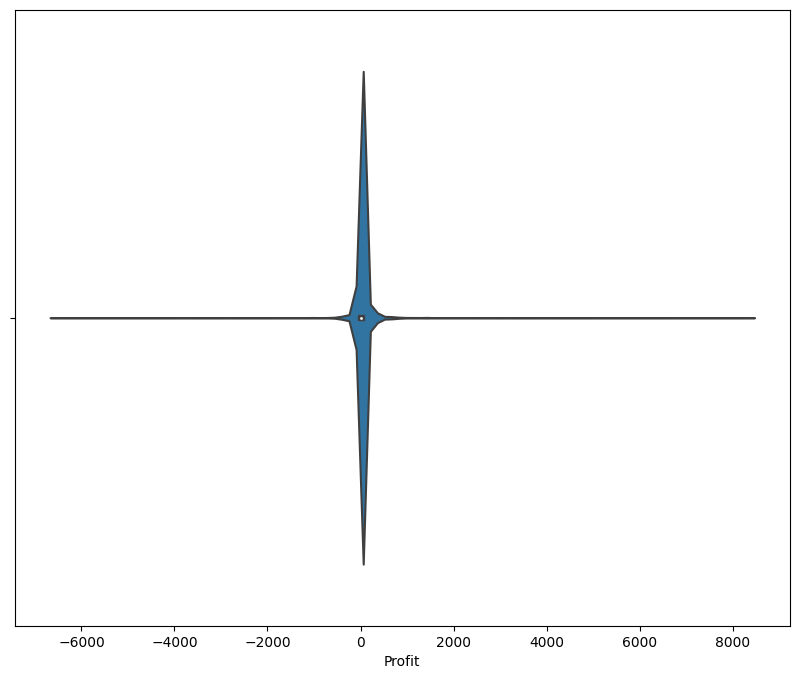

In [151]:
sns.violinplot(x='Profit',data=df)

<Axes: xlabel='Discount'>

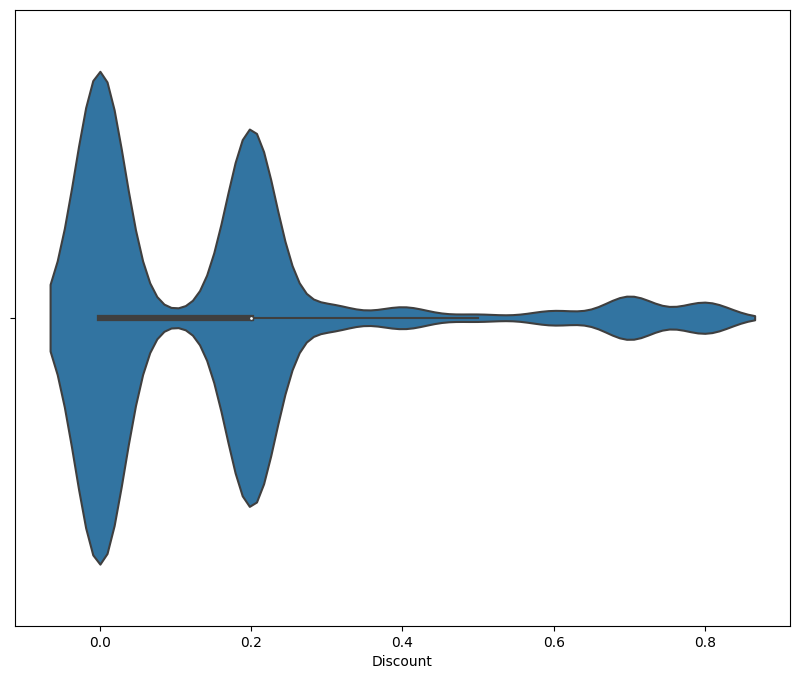

In [152]:
sns.violinplot(x='Discount',data=df)

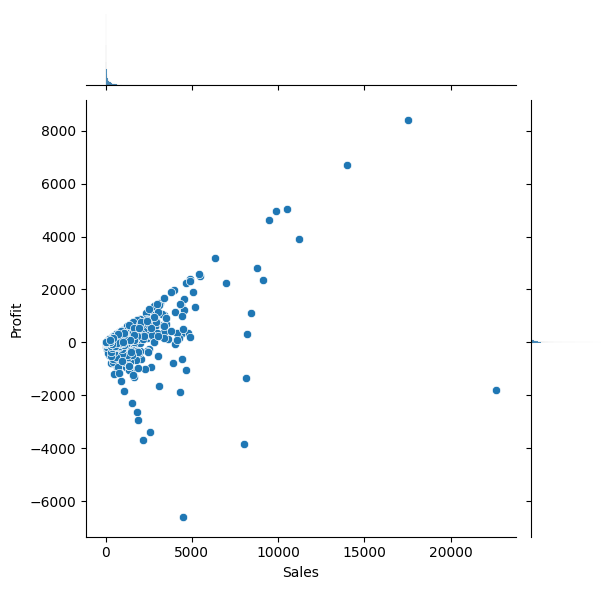

In [153]:
sns.jointplot(data=df,x='Sales',y='Profit')

In [154]:
df_corr=df.corr()
df_corr

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


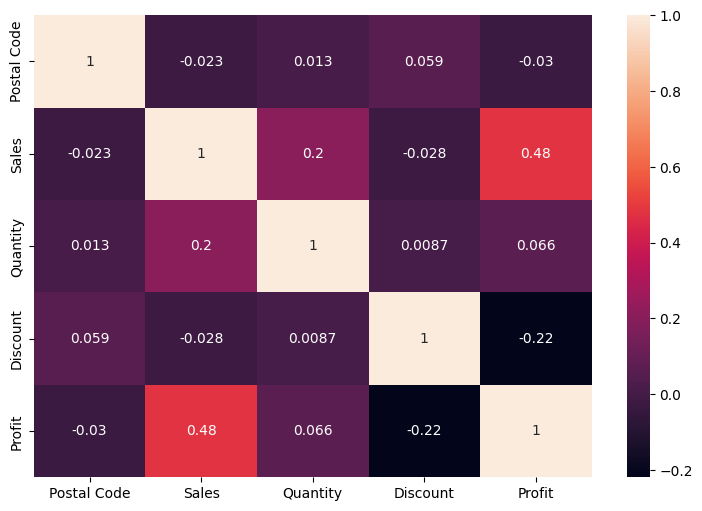

In [155]:
fig,axes=plt.subplots(1,1,figsize=(9,6))
sns.heatmap(df_corr,annot=True)
plt.show()

### Observation :

From above heatmap we can observe that there is negative corerelation between discount and profit

#  Relation between the customer segment,product category with the sales

In [156]:
grouped_data = df.groupby(['Segment', 'Category'])['Sales'].sum().reset_index()
grouped_data

,Segment,Category,Sales
0,Consumer,Furniture,390659.3420
1,Consumer,Office Supplies,363773.5360
2,Consumer,Technology,406399.8970
3,Corporate,Furniture,229019.7858
4,Corporate,Office Supplies,230600.2260
5,Corporate,Technology,246450.1190
6,Home Office,Furniture,121627.1855
7,Home Office,Office Supplies,124361.4820
8,Home Office,Technology,183304.0170


In [157]:
pivot_df = grouped_data.pivot(index='Segment', columns='Category', values='Sales')
pivot_df

Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,390659.3420,363773.536,406399.897
Corporate,229019.7858,230600.226,246450.119
Home Office,121627.1855,124361.482,183304.017


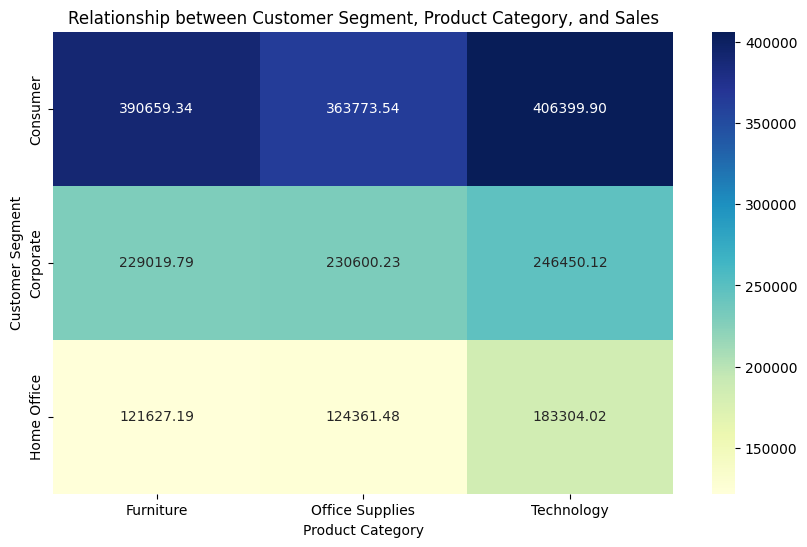

In [158]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Relationship between Customer Segment, Product Category, and Sales')
plt.xlabel('Product Category')
plt.ylabel('Customer Segment')
plt.show()

### Observation :

consumers who byes Technology have the highest sales


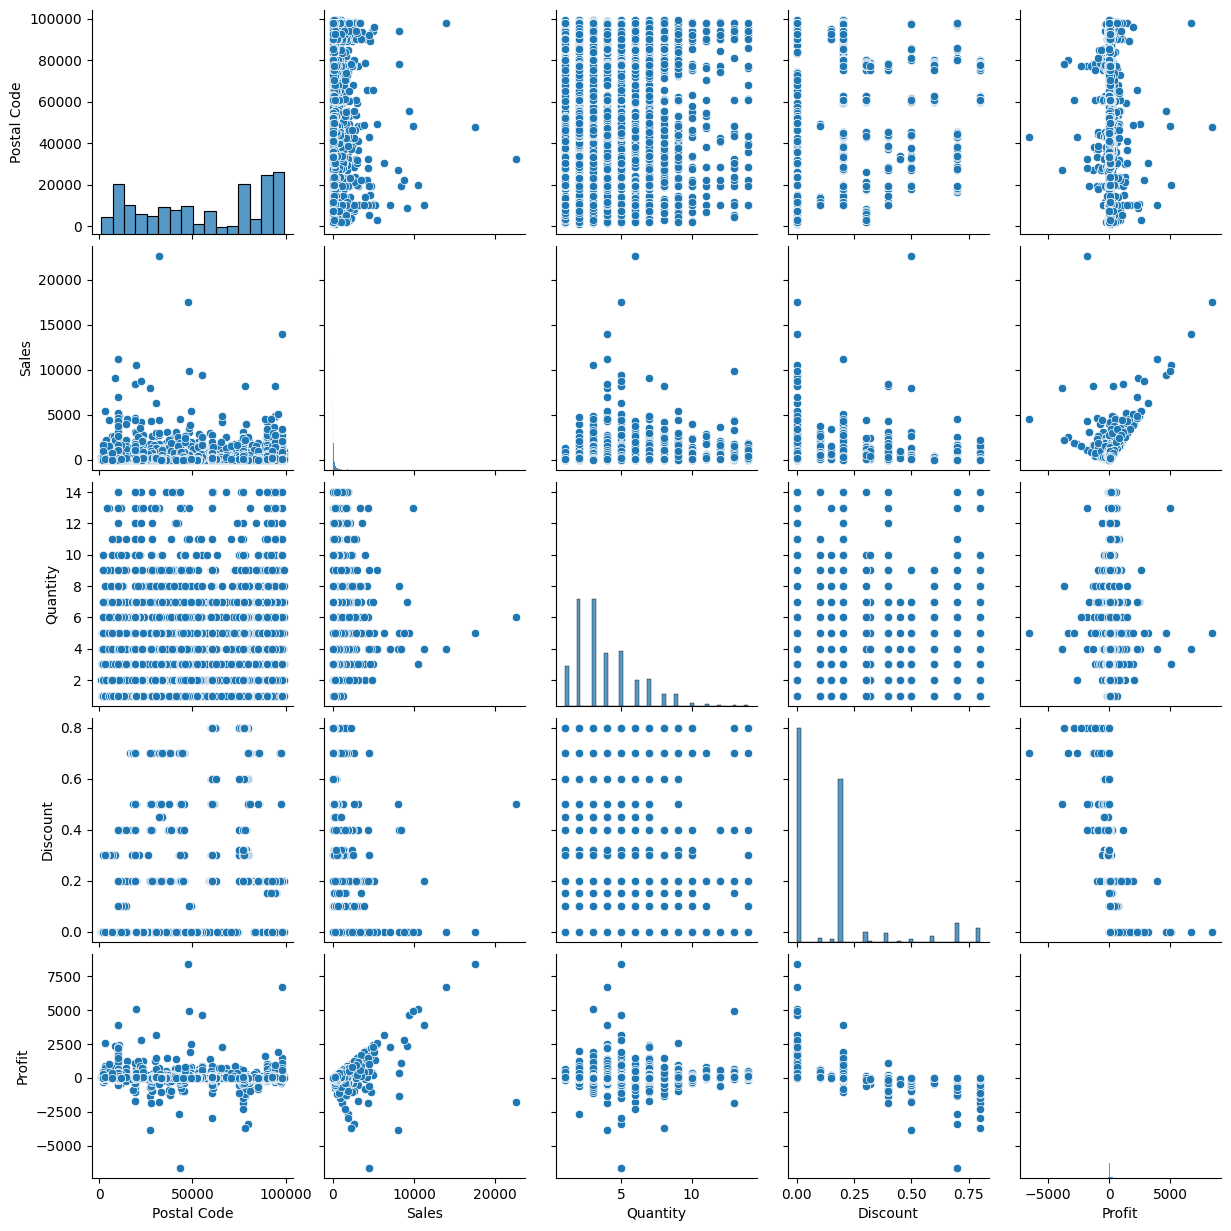

In [159]:
sns.pairplot(df)

<Axes: >

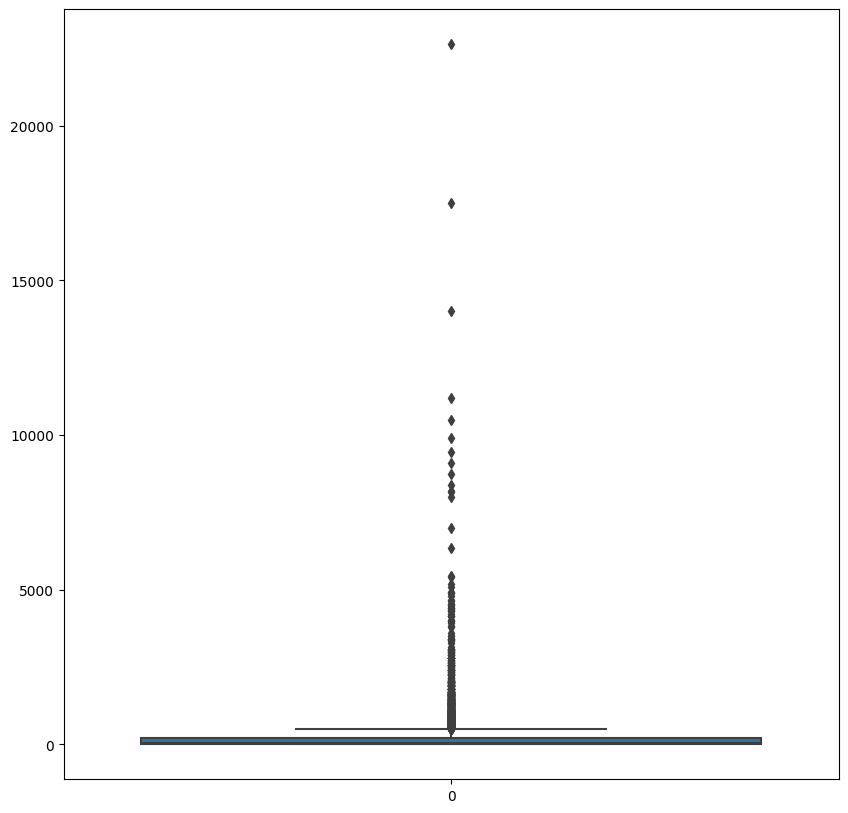

In [160]:
fig,axes=plt.subplots(figsize=(10,10))
sns.boxplot(df['Sales'])

<Axes: >

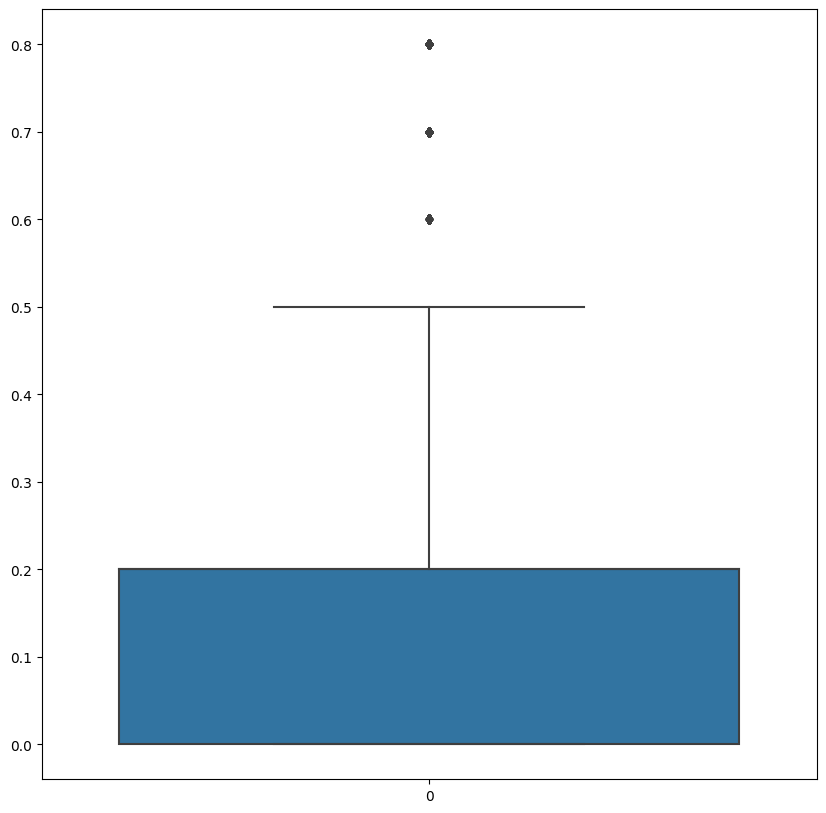

In [161]:
fig,axes=plt.subplots(figsize=(10,10))
sns.boxplot(df['Discount'])

<Axes: >

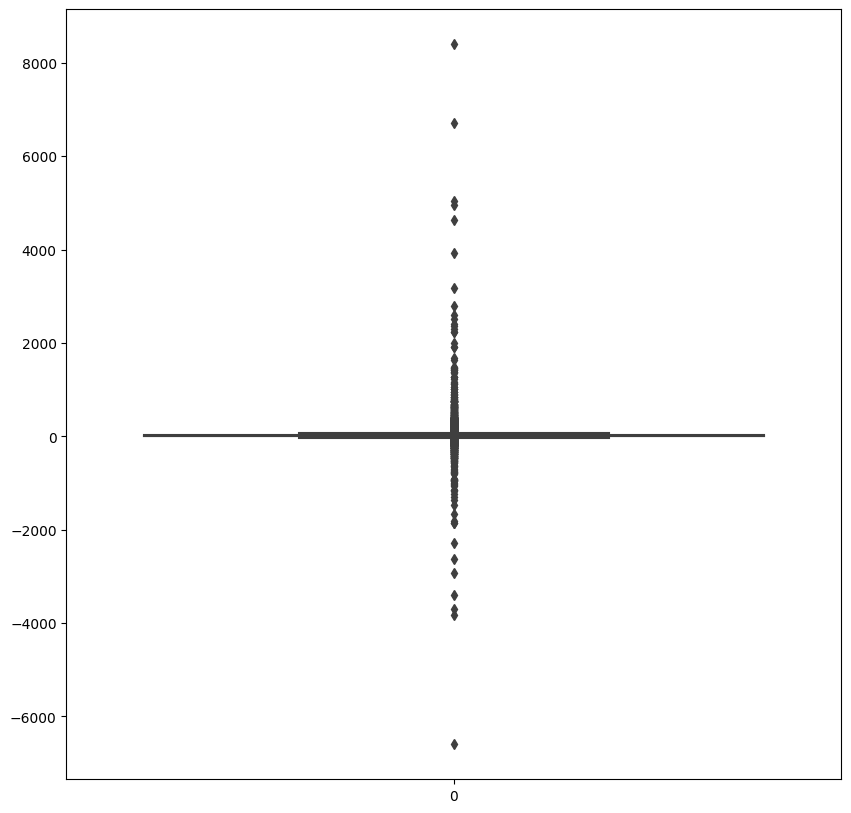

In [162]:
fig,axes=plt.subplots(figsize=(10,10))
sns.boxplot(df['Profit'])

# Sales Statistical data

count     9977.000000
mean       230.148902
std        623.721409
min          0.444000
25%         17.300000
50%         54.816000
75%        209.970000
max      22638.480000
Name: Sales, dtype: float64


<Axes: xlabel='Sales', ylabel='Density'>

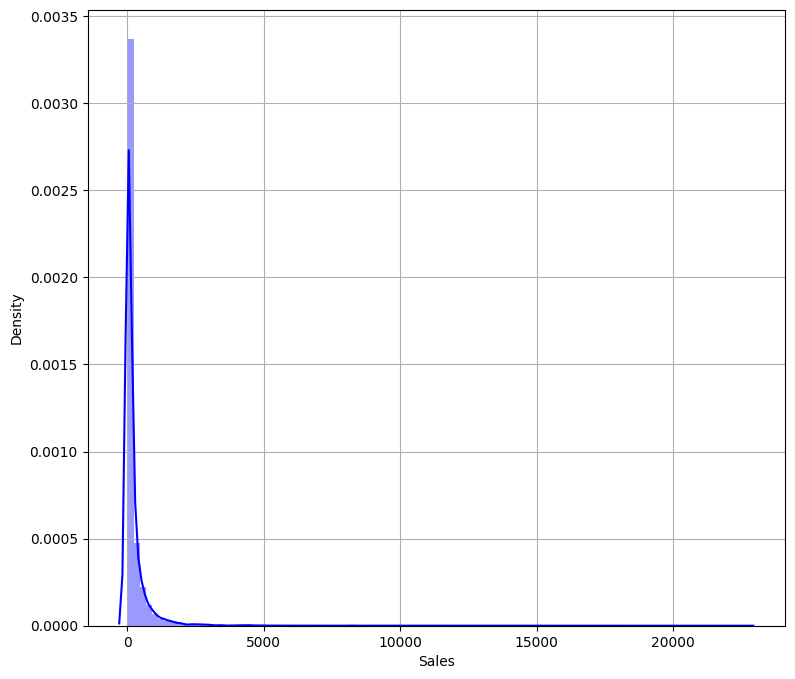

In [163]:
print(df['Sales'].describe())
plt.figure(figsize=(9,8))
plt.grid()
sns.distplot(df['Sales'],color='b',bins=100,hist_kws={'alpha':0.4})

# Handling Outliers


As we already see in the Data Visualization part, the Sales column having some outliers so it is important to handle this


In [164]:
df['Sales_log'] = np.log(df['Sales'])

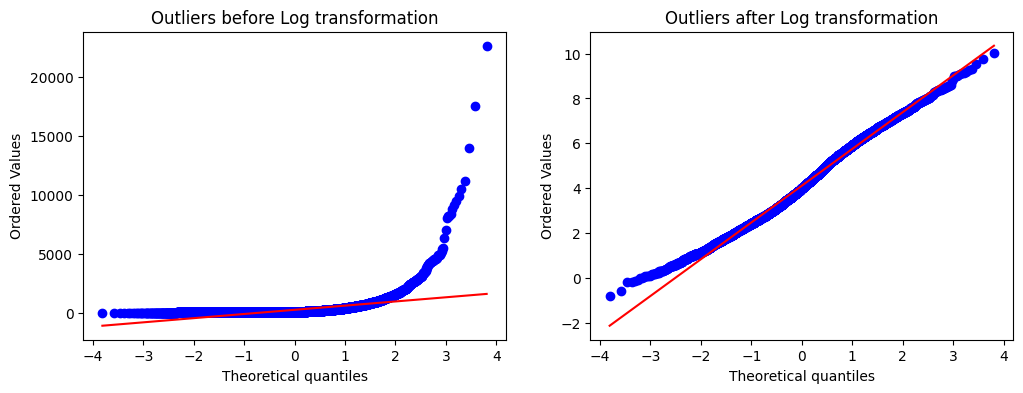

In [165]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
stats.probplot(df['Sales'], dist="norm", plot=ax1)
ax1.set_title('Outliers before Log transformation')
ax2 = fig.add_subplot(122)
stats.probplot(df['Sales_log'],dist="norm", plot=ax2)
ax2.set_title('Outliers after Log transformation')
plt.show()

# Conclusion

1. We can say that more profitable region is West and East whereas New york and California having highest profitable states.
2. and in terms of the Product Category Technology is highest but Furniture and Office Supplier are also good there are so many demand in all these product category.
3. Also the profit in South and Central is less,The Highest profit is earned in copiers while the selling of phones and chairs are extremely high compared to other products.
4. No or very less profit in sales of supplies.
5. Profit is more in sale of copiers.
6. Total sum of profit in sale of tables is negative.
7. Negative correlation between profit and Discount.


# Thank you